<a href="https://colab.research.google.com/github/lucasmbarboza/ICUFF_ML/blob/main/TopicosHLFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy 
!pip install pandas

In [2]:
!pip install tensorflow

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time

In [5]:
# D(X) -> Resposta do discriminador
def get_y(x):
    return 10 + x*x

# Dado original 
def sample_data(n=10000, scale=100):
    data = []

    x = scale*(np.random.random_sample((n,))-0.5)

    for i in range(n):
        yi = get_y(x[i])
        data.append([x[i], yi])

    return np.array(data)

In [6]:
# Ruído Z ; G(Z) é dado gerado pela rede neural treinada a partir do feedback do discriminador 
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

In [7]:
def generator(hsize=[16, 16],reuse=False):
    #with tf.variable_scope("GAN/Generator",reuse=reuse):
    # Cria o modelo / Funciona como stack de opercoes
    model =  tf.keras.Sequential()
    # Cria primeira camada da rede neural usando os input Z / layer.dense cria uma rede neural do tipo densa 
    model.add(tf.keras.layers.Dense(hsize[0], activation='relu'))
    # Cria a segunda camada da rede usando o input h1(Z)
    model.add( tf.keras.layers.Dense(hsize[1],activation='relu'))
    # Cria a de saida camada da rede usando o input h2(h1(Z))
    model.add(tf.keras.layers.Dense(2)) 
    return model

In [8]:
def discriminator(hsize=[16, 16],reuse=False):
    # Cria o modelo / Funciona como stack de opercoes
    model =  tf.keras.Sequential()
    # Cria primeira camada da rede neural usando os input Z / layer.dense cria uma rede neural do tipo densa 
    model.add(tf.keras.layers.Dense(hsize[0], activation='relu'))
    # Cria a segunda camada da rede usando o input h1(Z)
    model.add( tf.keras.layers.Dense(hsize[1],activation='relu'))
    # Cria a de saida camada da rede usando o input h2(h1(Z))
    model.add(tf.keras.layers.Dense(2))
    # Cria a de saida camada da rede usando o input h3(h2(h1(Z)))
    model.add(tf.keras.layers.Dense(1))
    return model

In [9]:
gen = generator()
Z = sample_Z(1,4)
print(Z)
fake_data = gen(Z, training=False)
print(fake_data)

[[-0.79150034 -0.22535612  0.58819388  0.30633057]]
tf.Tensor([[0.13988976 0.10124623]], shape=(1, 2), dtype=float32)


In [10]:
dis= discriminator()
decision = dis(fake_data, training=False)
print(decision)

tf.Tensor([[-0.00827629]], shape=(1, 1), dtype=float32)


In [39]:
# Metrica cross entropia p
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [40]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [41]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [42]:
# Otimizador
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [43]:
EPOCHS = 50

In [59]:
BATCH_SIZE = 256
Y = sample_data()

In [60]:
for x in range(EPOCHS):
    Z = sample_Z(BATCH_SIZE,2) #

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      gen = generator()
      fake_data = gen(Z, training=True)
      
      disc = discriminator()
      real_output = disc(Y, training=True)
      fake_output = disc(fake_data, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, gen.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, disc.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, gen.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, disc.trainable_variables))

In [62]:
Z = sample_Z(BATCH_SIZE,2)
GZ = gen(Z,training=False)
x_plot = sample_data(n=BATCH_SIZE)

In [66]:
import matplotlib.pyplot as plt


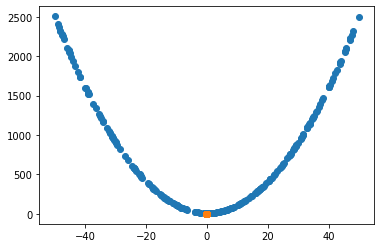

In [67]:
plt.figure()
xax = plt.scatter(x_plot[:,0], x_plot[:,1])
gax = plt.scatter(GZ[:,0],GZ[:,1])